In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import pycountry_convert as pc
import joblib

In [5]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [7]:
df = pd.read_csv("financial_risk_assessment.csv")
df.shape

(15000, 20)

In [8]:
df.head(10)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
5,30,Non-binary,PhD,Divorced,NaN,717.0,15613.0,Business,Unemployed,5,Fair,0.295984,NaN,4.0,Brianland,TN,Iceland,3.0,1,Medium
6,31,Non-binary,Master's,Widowed,45280.0,672.0,6553.0,Personal,Self-employed,1,Good,0.378890,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
7,18,Male,Bachelor's,Widowed,93678.0,NaN,NaN,Business,Unemployed,10,Poor,0.396636,246597.0,1.0,Melissahaven,MA,Honduras,1.0,1,Low
8,32,Non-binary,Bachelor's,Widowed,20205.0,710.0,NaN,Auto,Unemployed,4,Fair,0.335965,227599.0,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low
9,55,Male,Bachelor's,Married,32190.0,600.0,29918.0,Personal,Self-employed,5,Excellent,0.484333,130507.0,4.0,Davidstad,VT,Thailand,NaN,2,Low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [10]:
df.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


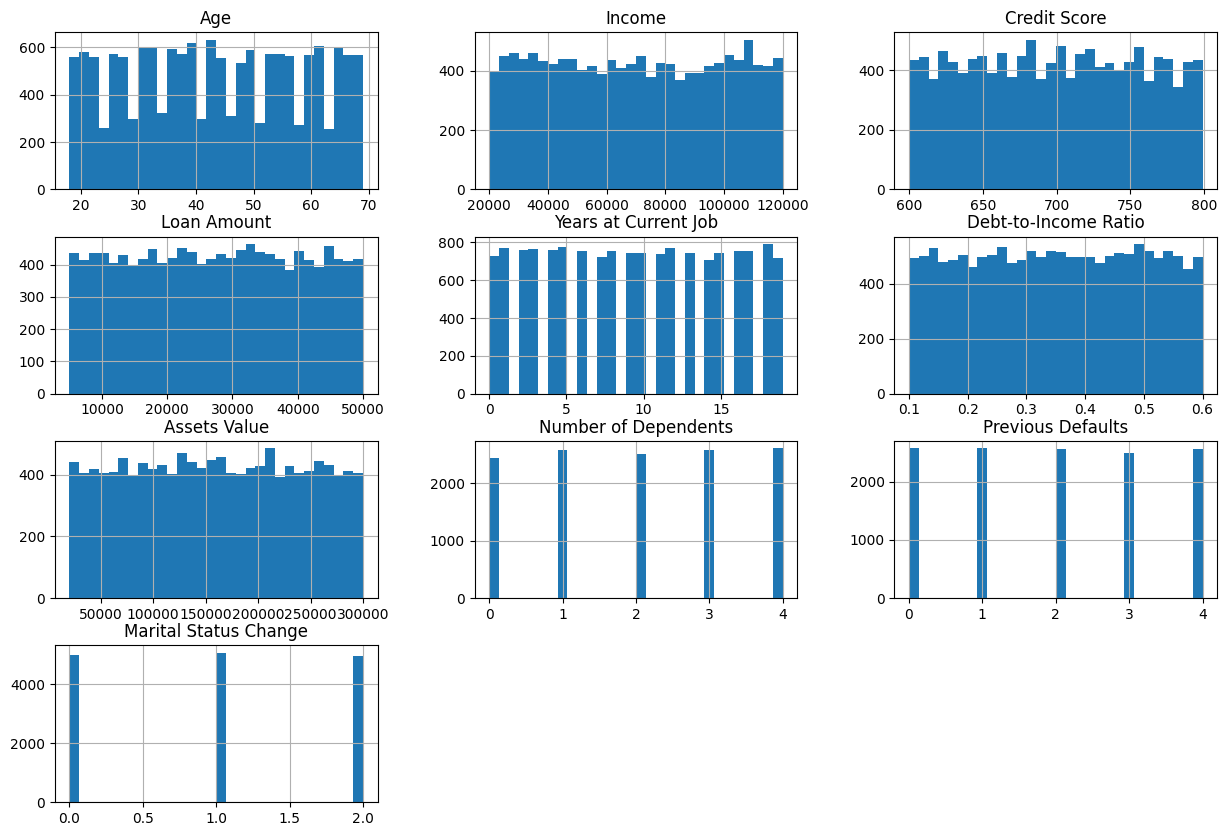

In [11]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

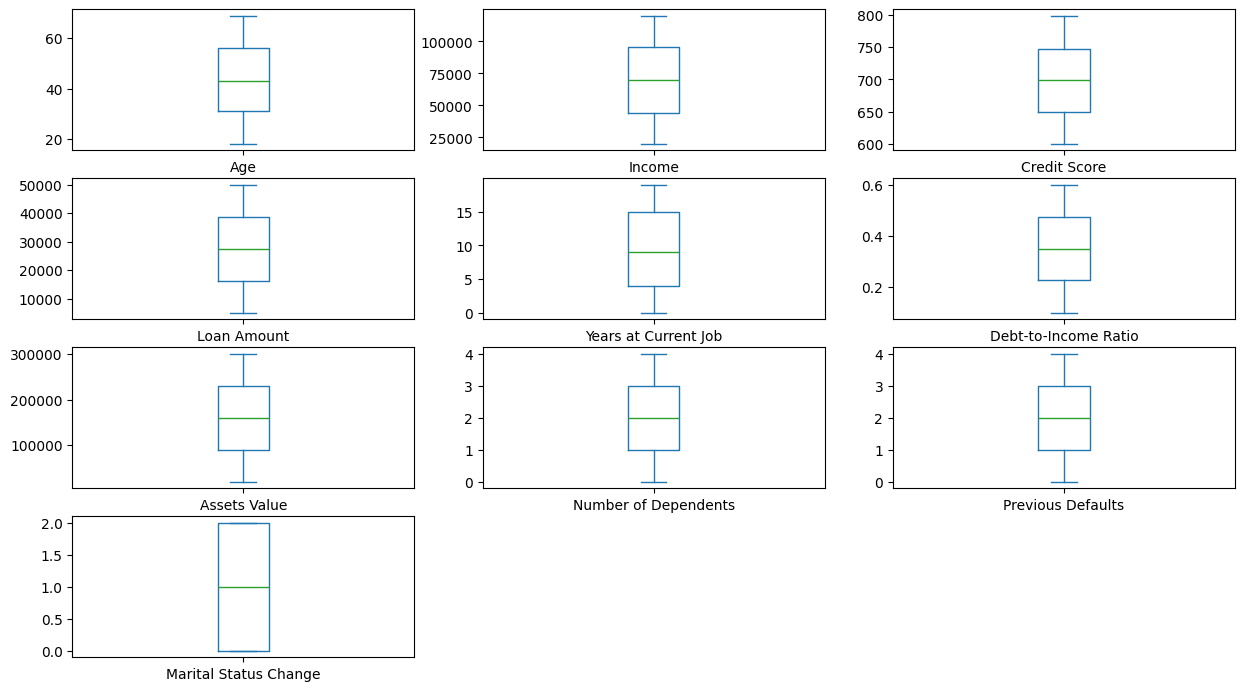

In [12]:
df.plot(kind='box', subplots=True, layout=(int(len(df.columns)/3)+1, 3), figsize=(15, 15))
plt.show()

In [13]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())
    print('\n')

Gender
Non-binary    5059
Female        4990
Male          4951
Name: count, dtype: int64


Education Level
Bachelor's     3829
High School    3774
PhD            3760
Master's       3637
Name: count, dtype: int64


Marital Status
Widowed     3893
Divorced    3787
Single      3697
Married     3623
Name: count, dtype: int64


Loan Purpose
Personal    3771
Home        3766
Business    3738
Auto        3725
Name: count, dtype: int64


Employment Status
Employed         5026
Self-employed    4991
Unemployed       4983
Name: count, dtype: int64


Payment History
Good         3822
Excellent    3789
Poor         3716
Fair         3673
Name: count, dtype: int64


City
East Michael      19
Lake Michael      16
Port Michael      16
West Michael      13
Lake James        13
                  ..
Deborahtown        1
Dakotafurt         1
West Cassie        1
Orrstad            1
West Lindaview     1
Name: count, Length: 10614, dtype: int64


State
CO    282
PW    279
KY    279
MP    277
DE    277
W

In [14]:
df['City'].nunique()

10614

In [15]:
df['Country'].nunique()

243

In [16]:
df['State'].nunique()

59

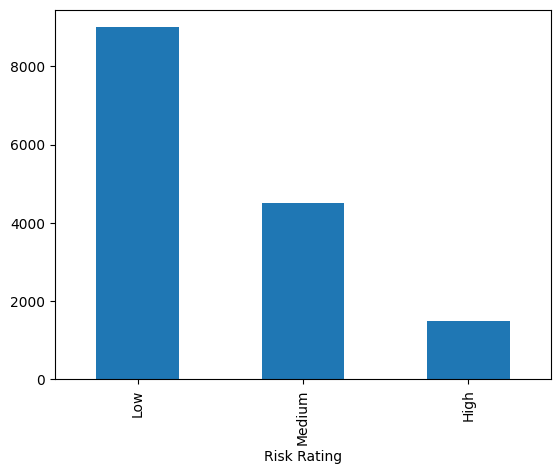

In [17]:
df['Risk Rating'].value_counts().plot(kind='bar')
plt.show()

# Data Preprocessing

In [18]:
#Drop rows with missing values
df = df.dropna()

In [19]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
10,42,Non-binary,Master's,Single,116212.0,707.0,24771.0,Home,Employed,11,Excellent,0.114134,212198.0,3.0,Matthewborough,NH,French Guiana,0.0,2,Medium
16,55,Male,High School,Married,70978.0,706.0,36970.0,Personal,Unemployed,19,Excellent,0.266941,54041.0,3.0,Christophermouth,MO,Tonga,1.0,0,Medium


In [20]:
#remove duplicates
df = df.drop_duplicates()

In [21]:
df.shape

(5716, 20)

In [22]:
#encoding

#Ordinal encoding for Risk Rating
risk_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Risk Rating'] = df['Risk Rating'].map(risk_mapping)

In [23]:
df['Country'].unique()

array(['Cyprus', 'Luxembourg', 'Uganda', 'French Guiana', 'Tonga',
       'Isle of Man', 'South Georgia and the South Sandwich Islands',
       'Guyana', 'Seychelles', 'Vietnam', 'Falkland Islands (Malvinas)',
       'Dominica', 'Brunei Darussalam', 'French Polynesia', 'Zimbabwe',
       'Haiti', 'Armenia', 'Egypt', 'Jordan', 'Thailand', 'Botswana',
       'Russian Federation', 'Mali', 'Ukraine', 'Ethiopia', 'Angola',
       'Guatemala', 'Monaco', 'Gambia', 'Romania',
       'Palestinian Territory', 'Singapore', 'Saint Pierre and Miquelon',
       'Lesotho', 'Argentina', 'South Africa', 'El Salvador', 'Jersey',
       'Suriname', 'Mayotte', 'Samoa', 'Micronesia', 'Azerbaijan',
       'Austria', 'Indonesia', 'Peru', 'Norway', 'Bangladesh',
       'Sao Tome and Principe', 'Martinique', 'Finland', 'Andorra',
       'Libyan Arab Jamahiriya', 'Costa Rica', 'Western Sahara',
       'Vanuatu', 'Pakistan', 'Grenada', 'New Caledonia', 'Cape Verde',
       'Marshall Islands', 'Wallis and Futuna'

In [24]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continents = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continents[continent_code]
    except (KeyError, LookupError):
        return 'Unknown'

In [25]:
df['Continent'] = df['Country'].apply(country_to_continent)

In [26]:
# drop state and city columns
df = df.drop(columns=['State', 'City', 'Country'])

In [27]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,Risk Rating,Continent
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,2.0,2,1,Asia
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,3.0,2,2,Europe
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,4.0,2,2,Africa
10,42,Non-binary,Master's,Single,116212.0,707.0,24771.0,Home,Employed,11,Excellent,0.114134,212198.0,3.0,0.0,2,2,South America
16,55,Male,High School,Married,70978.0,706.0,36970.0,Personal,Unemployed,19,Excellent,0.266941,54041.0,3.0,1.0,0,2,Oceania


In [28]:
df.shape

(5716, 18)

In [29]:
df['Continent'].nunique()

8

In [30]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America', 'Unknown', 'Antarctica'], dtype=object)

In [31]:
#One-Hot encoding for Education Level, Marital Status, Loan Purpose, Employment Status, and Payment History
df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 'Payment History', 'Continent'])

In [32]:
df.head()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,...,Payment History_Good,Payment History_Poor,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
0,49,72799.0,688.0,45713.0,19,0.154313,120228.0,0.0,2.0,2,...,False,True,False,False,True,False,False,False,False,False
2,21,55687.0,600.0,36623.0,8,0.362398,180700.0,3.0,3.0,2,...,False,False,False,False,False,True,False,False,False,False
3,59,26508.0,622.0,26541.0,2,0.454964,157319.0,3.0,4.0,2,...,False,False,True,False,False,False,False,False,False,False
10,42,116212.0,707.0,24771.0,11,0.114134,212198.0,3.0,0.0,2,...,False,False,False,False,False,False,False,False,True,False
16,55,70978.0,706.0,36970.0,19,0.266941,54041.0,3.0,1.0,0,...,False,False,False,False,False,False,False,True,False,False


In [33]:
df.shape

(5716, 41)

In [34]:
#splitting features and the target
X = df.drop(columns=['Risk Rating'])
y = df['Risk Rating']

In [35]:
X

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,...,Payment History_Good,Payment History_Poor,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
0,49,72799.0,688.0,45713.0,19,0.154313,120228.0,0.0,2.0,2,...,False,True,False,False,True,False,False,False,False,False
2,21,55687.0,600.0,36623.0,8,0.362398,180700.0,3.0,3.0,2,...,False,False,False,False,False,True,False,False,False,False
3,59,26508.0,622.0,26541.0,2,0.454964,157319.0,3.0,4.0,2,...,False,False,True,False,False,False,False,False,False,False
10,42,116212.0,707.0,24771.0,11,0.114134,212198.0,3.0,0.0,2,...,False,False,False,False,False,False,False,False,True,False
16,55,70978.0,706.0,36970.0,19,0.266941,54041.0,3.0,1.0,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,49,29734.0,652.0,44356.0,13,0.567928,78123.0,3.0,2.0,0,...,False,False,False,False,False,False,True,False,False,False
14989,35,108652.0,682.0,21953.0,9,0.560202,208538.0,0.0,1.0,1,...,False,False,False,False,False,True,False,False,False,False
14991,43,110352.0,662.0,36790.0,13,0.474802,203890.0,2.0,2.0,1,...,True,False,False,False,True,False,False,False,False,False
14994,40,43655.0,614.0,34565.0,11,0.399901,32179.0,4.0,1.0,1,...,False,True,False,False,True,False,False,False,False,False


In [36]:
X.columns

Index(['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Previous Defaults', 'Marital Status Change', 'Gender_Female',
       'Gender_Male', 'Gender_Non-binary', 'Education Level_Bachelor's',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Marital Status_Widowed', 'Loan Purpose_Auto', 'Loan Purpose_Business',
       'Loan Purpose_Home', 'Loan Purpose_Personal',
       'Employment Status_Employed', 'Employment Status_Self-employed',
       'Employment Status_Unemployed', 'Payment History_Excellent',
       'Payment History_Fair', 'Payment History_Good', 'Payment History_Poor',
       'Continent_Africa', 'Continent_Antarctica', 'Continent_Asia',
       'Continent_Europe', 'Continent_North America', 'Continent_Oceania',
       'Continent_South America

In [37]:
y

0        1
2        2
3        2
10       2
16       2
        ..
14986    1
14989    1
14991    1
14994    1
14997    3
Name: Risk Rating, Length: 5716, dtype: int64

In [38]:
#normalization
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[0.60784314 0.52804009 0.44221106 ... 0.         0.         0.        ]
 [0.05882353 0.35685847 0.         ... 0.         0.         0.        ]
 [0.80392157 0.06496339 0.11055276 ... 0.         0.         0.        ]
 ...
 [0.49019608 0.90370533 0.31155779 ... 0.         0.         0.        ]
 [0.43137255 0.23649514 0.07035176 ... 0.         0.         0.        ]
 [0.21568627 0.26245448 0.21105528 ... 1.         0.         0.        ]]


In [39]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
#resampling

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(scaled_data, y)

In [41]:
y_resampled.shape

(10272,)

In [42]:
X_resampled.shape

(10272, 40)

In [43]:
#train test split

train_data,test_data,train_target,test_target = train_test_split(X_resampled,y_resampled,test_size = 0.2,random_state=100)

# Model Training

### Random Forest

In [44]:
rf = RandomForestClassifier(class_weight='balanced')

In [45]:
param_dist = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False],  
}

In [46]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1_weighted',  
    cv=5,  
    verbose=1,
    n_jobs=-1,  
    random_state=42
)

In [47]:
random_search.fit(train_data, train_target)
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\HP\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


In [48]:
best_rf_model = random_search.best_estimator_

In [49]:
predicted_target = best_rf_model.predict(test_data)

In [50]:
acc2 = accuracy_score(test_target,predicted_target)
print("Accuracy  :",acc2)

Accuracy  : 0.7990267639902676


In [51]:
report2 = classification_report(test_target,predicted_target)
print(report2)

              precision    recall  f1-score   support

           1       0.68      0.89      0.77       689
           2       0.84      0.62      0.71       680
           3       0.93      0.89      0.91       686

    accuracy                           0.80      2055
   macro avg       0.82      0.80      0.80      2055
weighted avg       0.82      0.80      0.80      2055



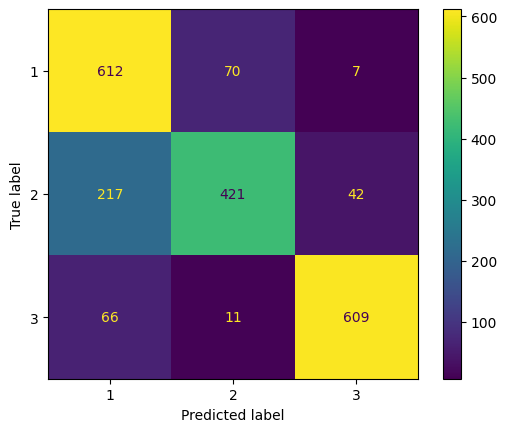

In [52]:
cm2 = confusion_matrix(test_target, predicted_target, labels=best_rf_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=best_rf_model.classes_)

disp.plot()
plt.show()

In [53]:
cross_val_acc2 = cross_val_score(best_rf_model, X_resampled, y_resampled, cv=5)
print("Cross Validation Accuracy: ", cross_val_acc2.mean())

Cross Validation Accuracy:  0.7921781486246052


### SVM

In [54]:
svm_model = SVC(class_weight='balanced')

In [55]:
param_dist = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto'],  
    'degree': [2, 3, 4], 
}

In [56]:
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1_weighted',  
    cv=5, 
    verbose=1,
    n_jobs=-1,  
    random_state=42
)

In [57]:
random_search.fit(train_data, train_target)
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 10}


In [58]:
best_svm_model = random_search.best_estimator_

In [59]:
predicted_target = best_svm_model.predict(test_data)

In [60]:
acc4 = accuracy_score(test_target,predicted_target)
print("Accuracy  :",acc4)

Accuracy  : 0.7883211678832117


In [61]:
report4 = classification_report(test_target,predicted_target)
print(report4)

              precision    recall  f1-score   support

           1       0.71      0.66      0.69       689
           2       0.73      0.74      0.74       680
           3       0.90      0.96      0.93       686

    accuracy                           0.79      2055
   macro avg       0.78      0.79      0.79      2055
weighted avg       0.78      0.79      0.79      2055



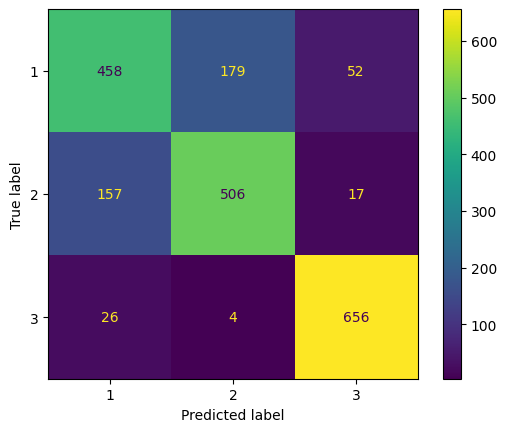

In [62]:
cm4 = confusion_matrix(test_target, predicted_target, labels=best_svm_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=best_svm_model.classes_)

disp.plot()
plt.show()

In [63]:
cross_val_acc4 = cross_val_score(best_svm_model, X_resampled, y_resampled, cv=5)
print("Cross Validation Accuracy: ", cross_val_acc4.mean())

Cross Validation Accuracy:  0.7916834282167369


### MLP

In [64]:
mlp_model = MLPClassifier(max_iter=300)

In [65]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 100, 50)],  
    'activation': ['tanh', 'relu'],  
    'solver': ['adam', 'sgd'],  
    'alpha': [0.0001, 0.001, 0.01],  
    'learning_rate': ['constant', 'adaptive'],  
    'learning_rate_init': [0.001, 0.01, 0.1],  
}

In [66]:
random_search = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1_weighted',  
    cv=5,  
    verbose=1,
    n_jobs=-1,  
    random_state=42
)

In [67]:
random_search.fit(train_data, train_target)
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'solver': 'sgd', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.01, 'activation': 'relu'}


In [68]:
best_mlp_model = random_search.best_estimator_

In [69]:
predicted_target = best_mlp_model.predict(test_data)

In [70]:
acc5 = accuracy_score(test_target,predicted_target)
print("Accuracy  :",acc5)

Accuracy  : 0.770316301703163


In [71]:
report5 = classification_report(test_target,predicted_target)
print(report5)

              precision    recall  f1-score   support

           1       0.73      0.60      0.66       689
           2       0.71      0.77      0.73       680
           3       0.86      0.95      0.90       686

    accuracy                           0.77      2055
   macro avg       0.77      0.77      0.77      2055
weighted avg       0.77      0.77      0.76      2055



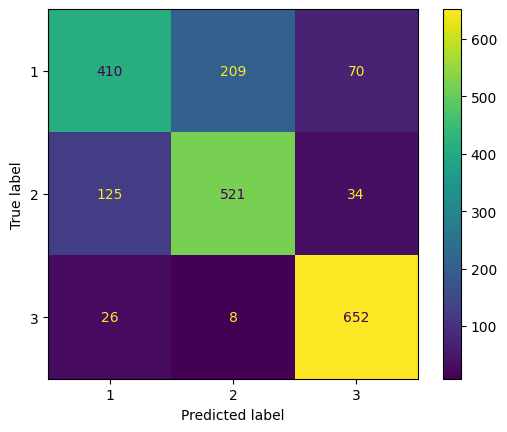

In [72]:
cm5 = confusion_matrix(test_target, predicted_target, labels=best_mlp_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=best_mlp_model.classes_)

disp.plot()
plt.show()

In [73]:
cross_val_acc5 = cross_val_score(best_mlp_model, X_resampled, y_resampled, cv=5)
print("Cross Validation Accuracy: ", cross_val_acc5.mean())

Cross Validation Accuracy:  0.779900307275342


### KNN

In [74]:
knn = KNeighborsClassifier()

In [75]:
param_dist = {
    'n_neighbors': np.arange(3, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

In [76]:
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_macro', 
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [77]:
random_search.fit(train_data, train_target)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='f1_macro', verbose=1)

In [78]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'weights': 'distance', 'n_neighbors': np.int64(4), 'metric': 'manhattan'}


In [79]:
best_knn_model = random_search.best_estimator_

In [80]:
best_knn_model.fit(train_data, train_target)

KNeighborsClassifier(metric='manhattan', n_neighbors=np.int64(4),
                     weights='distance')

In [81]:
predicted_target_3 = best_knn_model.predict(test_data)

In [82]:
acc3 = accuracy_score(test_target,predicted_target_3)
print("Accuracy  :",acc3)

Accuracy  : 0.7790754257907543


In [83]:
report3 = classification_report(test_target,predicted_target_3)
print(report3)

              precision    recall  f1-score   support

           1       0.82      0.50      0.62       689
           2       0.72      0.84      0.78       680
           3       0.81      0.99      0.89       686

    accuracy                           0.78      2055
   macro avg       0.78      0.78      0.76      2055
weighted avg       0.79      0.78      0.76      2055



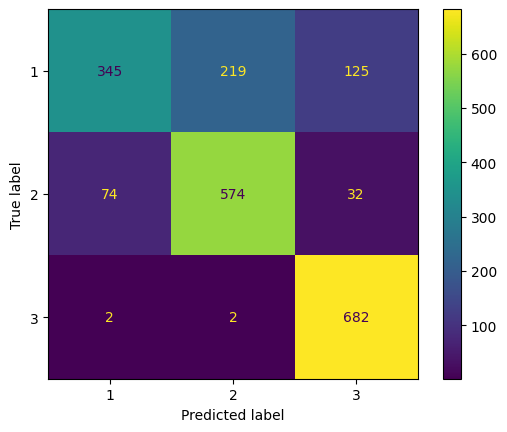

In [84]:
cm3 = confusion_matrix(test_target, predicted_target_3, labels=best_knn_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=best_knn_model.classes_)

disp.plot()
plt.show()

In [85]:
cross_val_acc3 = cross_val_score(best_knn_model, X_resampled, y_resampled, cv=5)
print("Cross Validation Accuracy: ", cross_val_acc3.mean())

Cross Validation Accuracy:  0.7871948864834386


In [86]:
train_accuracy = random_search.best_score_

test_f1 = f1_score(test_target, predicted_target_3, average='weighted')
print(f"Training F1 Score: {train_accuracy:.2f}, Test F1 Score: {test_f1:.2f}")

Training F1 Score: 0.74, Test F1 Score: 0.76


# Final Model

In [87]:
import joblib

# Save the model to a file
joblib.dump(best_rf_model, 'model.pkl')

['model.pkl']